In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model

In [2]:
df=pd.read_csv("F:\\mysql\\data.csv")

pd.options.mode.chained_assignment = None 
df.head()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False


In [3]:
left=df[df.in_college==False]

In [4]:
left.shape

(500, 11)

In [5]:
nleft=df[df.in_college==True]
nleft.shape

(500, 11)

In [6]:
df1=df.groupby(df.in_college).mean()

In [7]:
df1

,parent_age,parent_salary,house_area,average_grades,parent_was_in_college
in_college,,,,,
False,52.058,4717100.0,67.3728,84.39134,0.496
True,52.358,6046040.0,81.6578,87.80306,0.544


<AxesSubplot:xlabel='gender'>

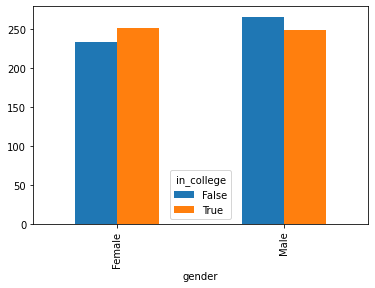

In [8]:
pd.crosstab(df.gender,df.in_college).plot(kind="bar")

<AxesSubplot:xlabel='interest'>

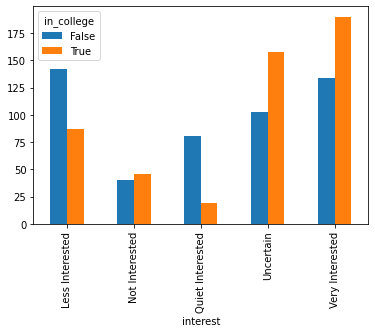

In [9]:
pd.crosstab(df.interest,df.in_college).plot(kind="bar")

<AxesSubplot:xlabel='residence'>

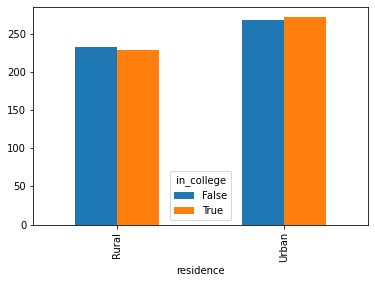

In [10]:
pd.crosstab(df.residence,df.in_college).plot(kind="bar")

In [11]:
df1=df[['parent_salary','house_area' ,'interest','in_college','school_accreditation','gender','residence','parent_was_in_college','type_school']]

In [12]:
df1['gender']=df1['gender'].map({'Male': 0,'Female': 1})
df1['residence']=df1['residence'].map({'Urban':0,'Rural':1})
df1['parent_was_in_college']=df1['parent_was_in_college'].astype(int)
df1["in_college"] = df1["in_college"].astype(int)
df1["school_accreditation"]=df1["school_accreditation"].map({'A':1,'B':0})
df1["type_school"]=df1['type_school'].map({'Academic':1,'Vocational':0})
# df1['interest']=df1['interest'].map({'Very Interested': 0,'Uncertain': 1,'Less Interested':2,'Quiet Interested':3, 'Not Interested':4})
df1

,parent_salary,house_area,interest,in_college,school_accreditation,gender,residence,parent_was_in_college,type_school
0,6950000,83.0,Less Interested,1,1,0,0,0,1
1,4410000,76.8,Less Interested,1,1,0,0,0,1
2,6500000,80.6,Very Interested,1,0,1,0,0,1
3,6600000,78.2,Very Interested,1,0,0,1,1,0
4,5250000,75.1,Very Interested,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...
995,7420000,63.6,Very Interested,1,1,1,1,1,0
996,7480000,84.3,Less Interested,1,0,1,1,1,1
997,5550000,75.2,Less Interested,1,1,0,0,0,0
998,5840000,105.8,Uncertain,1,0,0,1,1,1


In [13]:
df2=pd.get_dummies(df1.interest)

In [14]:
 df2

,Less Interested,Not Interested,Quiet Interested,Uncertain,Very Interested
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
995,0,0,0,0,1
996,1,0,0,0,0
997,1,0,0,0,0
998,0,0,0,1,0


In [15]:
 df4=pd.concat([df2,df1],axis="columns")

In [16]:
 df4

,Less Interested,Not Interested,Quiet Interested,Uncertain,Very Interested,parent_salary,house_area,interest,in_college,school_accreditation,gender,residence,parent_was_in_college,type_school
0,1,0,0,0,0,6950000,83.0,Less Interested,1,1,0,0,0,1
1,1,0,0,0,0,4410000,76.8,Less Interested,1,1,0,0,0,1
2,0,0,0,0,1,6500000,80.6,Very Interested,1,0,1,0,0,1
3,0,0,0,0,1,6600000,78.2,Very Interested,1,0,0,1,1,0
4,0,0,0,0,1,5250000,75.1,Very Interested,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,1,7420000,63.6,Very Interested,1,1,1,1,1,0
996,1,0,0,0,0,7480000,84.3,Less Interested,1,0,1,1,1,1
997,1,0,0,0,0,5550000,75.2,Less Interested,1,1,0,0,0,0
998,0,0,0,1,0,5840000,105.8,Uncertain,1,0,0,1,1,1


In [17]:
df3=df4.drop(["interest","Uncertain"],axis="columns")
df3.head()

,Less Interested,Not Interested,Quiet Interested,Very Interested,parent_salary,house_area,in_college,school_accreditation,gender,residence,parent_was_in_college,type_school
0,1,0,0,0,6950000,83.0,1,1,0,0,0,1
1,1,0,0,0,4410000,76.8,1,1,0,0,0,1
2,0,0,0,1,6500000,80.6,1,0,1,0,0,1
3,0,0,0,1,6600000,78.2,1,0,0,1,1,0
4,0,0,0,1,5250000,75.1,0,1,1,0,0,1


In [18]:
df1.head()

,parent_salary,house_area,interest,in_college,school_accreditation,gender,residence,parent_was_in_college,type_school
0,6950000,83.0,Less Interested,1,1,0,0,0,1
1,4410000,76.8,Less Interested,1,1,0,0,0,1
2,6500000,80.6,Very Interested,1,0,1,0,0,1
3,6600000,78.2,Very Interested,1,0,0,1,1,0
4,5250000,75.1,Very Interested,0,1,1,0,0,1


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [28]:
X=df3.drop('in_college',axis="columns")

In [29]:
scaler =StandardScaler()
Xs = scaler.fit_transform(X)

In [30]:
y=df1.in_college

In [31]:
y.head()

0    1
1    1
2    1
3    1
4    0
Name: in_college, dtype: int32

In [32]:
X_train,X_test,y_train,y_test=train_test_split(Xs,y,test_size=0.2)

In [33]:
model=linear_model.LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [34]:
model.score(X_test,y_test)

0.85